### EDA for project

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture as gmm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [4]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
#keep the data file in the same folder as this file
df=pd.read_csv("smoke_detection_iot.csv")
df

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


### Understanding the data

In [6]:
df.head()


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [7]:
df.tail()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [8]:
df.shape

(62630, 16)

In [9]:
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [10]:
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [11]:
df.nunique()

Unnamed: 0        62630
UTC               62630
Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
CNT               24994
Fire Alarm            2
dtype: int64

### Cleaning the data

In [12]:
df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [13]:
X=df.drop(["Fire Alarm","Unnamed: 0","UTC"],axis=1)
Y=df["Fire Alarm"]

In [14]:
X

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [15]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire Alarm, Length: 62630, dtype: int64

Relationship Analysis

In [16]:
correlation=X.corr()
correlation

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.083869
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.094741


In [17]:
redundant=pd.DataFrame()
Xupdated=X.copy()
for i in Xupdated.columns:
    for j in Xupdated.columns:
        c=X[i].corr(X[j])
        if(c>0.7 and c<1):
            redundant[i]=X[i]
            if(i in Xupdated.columns):
                Xupdated=Xupdated.drop([i],axis=1)
redundant

,eCO2[ppm],PM1.0,PM2.5,NC0.5,NC1.0,CNT
0,400,0.00,0.00,0.00,0.000,0
1,400,0.00,0.00,0.00,0.000,1
2,400,0.00,0.00,0.00,0.000,2
3,400,0.00,0.00,0.00,0.000,3
4,400,0.00,0.00,0.00,0.000,4
...,...,...,...,...,...,...
62625,400,0.63,0.65,4.32,0.673,5739
62626,400,0.61,0.63,4.18,0.652,5740
62627,400,0.57,0.60,3.95,0.617,5741
62628,400,0.57,0.59,3.92,0.611,5742


In [18]:
Xupdated

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],NC2.5
0,20.000,57.36,0,12306,18520,939.735,0.000
1,20.015,56.67,0,12345,18651,939.744,0.000
2,20.029,55.96,0,12374,18764,939.738,0.000
3,20.044,55.28,0,12390,18849,939.736,0.000
4,20.059,54.69,0,12403,18921,939.744,0.000
...,...,...,...,...,...,...,...
62625,18.438,15.79,625,13723,20569,936.670,0.015
62626,18.653,15.87,612,13731,20588,936.678,0.015
62627,18.867,15.84,627,13725,20582,936.687,0.014
62628,19.083,16.04,638,13712,20566,936.680,0.014


In [19]:
correlation1=Xupdated.corr()
correlation1

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],NC2.5
Temperature[C],1.000000,-0.243986,0.082442,-0.135540,-0.037343,-0.251203,0.025526
Humidity[%],-0.243986,1.000000,-0.488878,0.247199,0.068782,0.694614,-0.118502
TVOC[ppb],0.082442,-0.488878,1.000000,-0.653053,-0.673715,-0.220004,0.344721
Raw H2,-0.135540,0.247199,-0.653053,1.000000,0.631495,0.303090,-0.318518
Raw Ethanol,-0.037343,0.068782,-0.673715,0.631495,1.000000,-0.075926,-0.293351
Pressure[hPa],-0.251203,0.694614,-0.220004,0.303090,-0.075926,1.000000,-0.213390
NC2.5,0.025526,-0.118502,0.344721,-0.318518,-0.293351,-0.213390,1.000000


<Axes: >

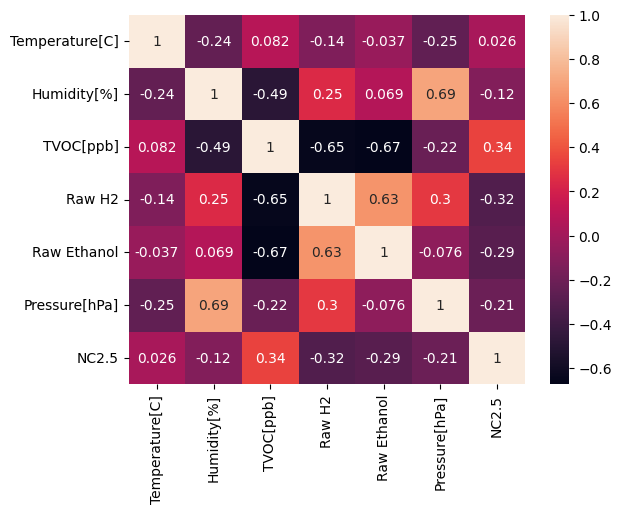

In [20]:
sns.heatmap(correlation1,xticklabels=correlation1.columns,yticklabels=correlation1.columns,annot=True)

In [21]:
newdf=pd.concat([Xupdated,Y], axis=1, join='inner')
newdf

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],NC2.5,Fire Alarm
0,20.000,57.36,0,12306,18520,939.735,0.000,0
1,20.015,56.67,0,12345,18651,939.744,0.000,0
2,20.029,55.96,0,12374,18764,939.738,0.000,0
3,20.044,55.28,0,12390,18849,939.736,0.000,0
4,20.059,54.69,0,12403,18921,939.744,0.000,0
...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,13723,20569,936.670,0.015,0
62626,18.653,15.87,612,13731,20588,936.678,0.015,0
62627,18.867,15.84,627,13725,20582,936.687,0.014,0
62628,19.083,16.04,638,13712,20566,936.680,0.014,0


In [22]:
#sns.pairplot(Xupdated)

In [23]:
# plots of pressure against other quantities were making some sense of clustering ,thus further exploring them

# sns.relplot(x="Pressure[hPa]",y="Temperature[C]",hue="Fire Alarm",data=newdf)
# sns.relplot(x="Pressure[hPa]",y="Humidity[%]",hue="Fire Alarm",data=newdf)
# sns.relplot(x="Pressure[hPa]",y="TVOC[ppb]",hue="Fire Alarm",data=newdf)
# sns.relplot(x="Pressure[hPa]",y="Raw H2",hue="Fire Alarm",data=newdf)
# sns.relplot(x="Pressure[hPa]",y="Raw Ethanol",hue="Fire Alarm",data=newdf)

### Applying Normalisation

In [24]:
ss=StandardScaler()
standard_data=ss.fit_transform(Xupdated)

mm=MinMaxScaler()
normalised_data=mm.fit_transform(Xupdated)

In [25]:
standard_data

array([[ 0.28062169,  0.99494707, -0.24861434, ..., -2.02500594,
         0.83176078, -0.07388861],
       [ 0.2816663 ,  0.91711549, -0.24861434, ..., -1.8100786 ,
         0.83852093, -0.07388861],
       [ 0.28264127,  0.83702792, -0.24861434, ..., -1.62468325,
         0.83401417, -0.07388861],
       ...,
       [ 0.20171901, -3.68848353, -0.16834834, ...,  1.35804894,
        -1.45767403, -0.07387569],
       [ 0.21676136, -3.66592365, -0.16694016, ...,  1.33179827,
        -1.46293192, -0.07387569],
       [ 0.23180371, -3.61177995, -0.16630008, ...,  1.29406294,
        -1.46593643, -0.07387569]])

In [26]:
normalised_data

array([[5.12692214e-01, 7.23239218e-01, 0.00000000e+00, ...,
        5.25685213e-01, 9.86013986e-01, 0.00000000e+00],
       [5.12875275e-01, 7.12534905e-01, 0.00000000e+00, ...,
        5.47185295e-01, 9.87012987e-01, 0.00000000e+00],
       [5.13046131e-01, 7.01520323e-01, 0.00000000e+00, ...,
        5.65731167e-01, 9.86346986e-01, 0.00000000e+00],
       ...,
       [4.98865023e-01, 7.91188334e-02, 1.04500000e-02, ...,
        8.64106352e-01, 6.47685648e-01, 4.66255771e-07],
       [5.01501098e-01, 8.22215327e-02, 1.06333333e-02, ...,
        8.61480387e-01, 6.46908647e-01, 4.66255771e-07],
       [5.04137174e-01, 8.96680112e-02, 1.07166667e-02, ...,
        8.57705564e-01, 6.46464646e-01, 4.66255771e-07]])

### Applying PCA

In [27]:
#on normal data
pca=PCA(n_components=2)
Xpca=pca.fit_transform(Xupdated)

In [28]:
#on normalised data
normalised_data_pca=pca.fit_transform(normalised_data)

In [29]:
#on standardised data
standard_data_pca=pca.fit_transform(standard_data)

In [30]:
#splitting train and test data
smoke_detection=pd.concat([Xupdated,Y],axis=1, join='inner')

standard_data=pd.DataFrame(standard_data,columns=Xupdated.columns)
smoke_detection_standardised=pd.concat([standard_data,Y],axis=1, join='inner')
smoke_detection_standardised

normalised_data=pd.DataFrame(normalised_data,columns=Xupdated.columns)
smoke_detection_normalised=pd.concat([normalised_data,Y],axis=1, join='inner')
smoke_detection_normalised

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],NC2.5,Fire Alarm
0,0.512692,0.723239,0.000000,0.522488,0.525685,0.986014,0.000000e+00,0
1,0.512875,0.712535,0.000000,0.534928,0.547185,0.987013,0.000000e+00,0
2,0.513046,0.701520,0.000000,0.544179,0.565731,0.986347,0.000000e+00,0
3,0.513229,0.690971,0.000000,0.549282,0.579682,0.986125,0.000000e+00,0
4,0.513412,0.681818,0.000000,0.553429,0.591498,0.987013,0.000000e+00,0
...,...,...,...,...,...,...,...,...
62625,0.493629,0.078343,0.010417,0.974482,0.861973,0.645799,4.995598e-07,0
62626,0.496253,0.079584,0.010200,0.977033,0.865091,0.646687,4.995598e-07,0
62627,0.498865,0.079119,0.010450,0.975120,0.864106,0.647686,4.662558e-07,0
62628,0.501501,0.082222,0.010633,0.970973,0.861480,0.646909,4.662558e-07,0


In [45]:

smoke_detection_0=smoke_detection[smoke_detection['Fire Alarm']==0]
smoke_detection_1=smoke_detection[smoke_detection['Fire Alarm']==1]
smoke_detection_0
smoke_detection_1

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],NC2.5,Fire Alarm
3178,9.381,56.86,11,13347,20160,939.575,0.043,1
3179,9.368,58.60,0,13385,20202,939.574,0.044,1
3180,9.356,60.38,0,13388,20248,938.858,0.047,1
3181,9.343,62.22,0,13443,20315,939.044,0.048,1
3182,9.331,63.11,0,13457,20348,939.193,0.050,1
...,...,...,...,...,...,...,...,...
51141,31.120,18.67,0,13077,20927,930.929,0.024,1
51145,27.320,43.84,29,12858,20752,937.610,0.054,1
51146,27.270,43.98,28,12860,20751,937.601,0.055,1
56889,20.191,43.84,29,12858,20752,937.610,0.054,1


In [32]:
[x_train_0, x_test_0, x_label_train_0, x_label_test_0] = train_test_split(smoke_detection_0, smoke_detection_0['Fire Alarm'], test_size=0.3, random_state=42, shuffle=True)
x_train_1_per=len(x_train_0)/len(smoke_detection_1)
x_train_0=x_train_0.drop(['Fire Alarm'],axis=1)
[x_train_1, x_test_1, x_label_train_1, x_label_test_1] = train_test_split(smoke_detection_1, smoke_detection_1['Fire Alarm'], test_size=1-x_train_1_per, random_state=42, shuffle=True)
x_train_1_per
x_train_1=x_train_1.drop(['Fire Alarm'],axis=1)

In [33]:
x_train=pd.concat([x_train_0,x_train_1],axis=0)
x_train

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],NC2.5
53991,28.220,44.41,174,12774,20548,937.408,0.041
25938,14.200,49.97,33,12999,19906,939.749,0.007
56235,53.660,22.15,60000,11119,15870,936.812,2524.314
54790,28.020,38.17,0,13347,21176,937.460,0.051
58958,-5.232,42.77,135,12791,20597,937.358,0.055
...,...,...,...,...,...,...,...
14462,15.437,52.73,1096,12871,19456,938.911,0.051
51121,33.600,16.90,0,13258,21006,930.918,0.027
44514,26.960,47.85,1218,12924,19421,938.698,0.041
4038,-0.868,48.05,129,13217,20076,939.653,0.043


In [34]:
x_test=pd.concat([x_test_0,x_test_1],axis=0)
x_test
x_test=x_test.drop(['Fire Alarm'],axis=1)

In [35]:
x_train_label=pd.concat([x_label_train_0,x_label_train_1],axis=0)
x_train_label=np.array(x_train_label)
x_train_label

array([0, 0, 0, ..., 1, 1, 1])

In [36]:
x_test_label=pd.concat([x_label_test_0,x_label_test_1],axis=0)
x_test_label=np.array(x_test_label)
x_test_label

array([0, 0, 0, ..., 1, 1, 1])

In [37]:
# gmm_0=gmm(n_components=3,covariance_type='full',reg_covar=1e-5)
# #estimating parameters for gmm using train data
# gmm_0.fit(x_train_0)
# #making gaussian mixture model components for class 1
# gmm_1=gmm(n_components=3,covariance_type='full',reg_covar=1e-5)
#     #estimating parameters for gmm using train data
# gmm_1.fit(x_train_1)
#     #calculating list of loglikelihood for each test data tuple for both gmm_0 and gmm_1
# ll_0=gmm_0.score_samples(x_test)
# ll_1=gmm_1.score_samples(x_test)
#     #making empty list to store predicted class using gmm classifier
# pred=[]
#     #doing this so that i and j maps to same index element of ll_0 and ll_1 and calculating posterier for each data tuple separately
# for i,j in zip(ll_0,ll_1):
#     #calculating likelihood for each test data tuple for both gmm_0 and gmm_1 or also called prior probability
#     p_x_0=np.exp(i)
#     p_x_1=np.exp(j)
#     #calculating P(Ci)
#     p_0=len(x_train_0)/(len(x_train_0)+len(x_train_1))
#     p_1=len(x_train_1)/(len(x_train_0)+len(x_train_1))
#     #Calculating posterior probability of each class
#     p_0_x=p_x_0*p_0/(p_x_0*p_0+p_x_1*p_1)
#     p_1_x=p_x_1*p_1/(p_x_0*p_0+p_x_1*p_1)
#     if p_0_x>p_1_x:
#         pred.append(0)
#     else:
#         pred.append(1)
# print('----- The confusion matrix using Bayes Classifier with GMM with Q =',3,' is -----')
# print()
# #giving output of confusion matix
# print(confusion_matrix(x_test_label,pred))
# print()
# print(accuracy_score(x_test_label, pred))

In [38]:
dtc=DecisionTreeClassifier()
dtc=dtc.fit(X=x_train,y=x_train_label)
dtc.score(x_test,x_test_label)

0.9989630141721396

### Deployment

In [39]:
import pickle

In [44]:
pickle.dump(dtc,open("model.pkl",'wb'))

In [41]:
model=pickle.load(open("model.pkl",'rb'))

In [42]:
model.predict

<bound method BaseDecisionTree.predict of DecisionTreeClassifier()>

In [43]:
!python --version

zsh:1: command not found: python
